# Working with the GLORIA database

The Global Resource Input Output Assessment (GLORIA) database are available to download through a dropbox folder [GLORIA database.](https://www.dropbox.com/sh/o4fxq94n7grvdbk/AABhKvEVx0UuMvz4dQ4NlWC8a?d) There is no specific licence given for the this database.

Currently (as per May 2024), there are five available versions 53, 54, 55, 57 and 59 

## Getting GLORIA

In [1]:
import pymrio

In [7]:
path_gloria = "/tmp/mrios/autodownload/GLORIA2014"
meta_2014_download = pymrio.download_gloria(
    storage_folder=path_gloria, version=59, year=2014
)

In [5]:
meta_2014_download

Description: Download log of Gloria
MRIO Name: GLORIA
System: IxI
Version: 59
File: /tmp/mrios/autodownload/GLORIA2014/download_log.json
History:
20240502 16:03:16 - FILEIO -  Downloaded https://dl.dropboxusercontent.com/sh/o4fxq94n7grvdbk/AABw5dyUYvEAWbG8n9-yXAPqa/latest_release/GLORIA_ReadMe_059.xlsx?dl=0 to GLORIA_ReadMe_059.xlsx
20240502 16:03:14 - FILEIO -  Downloaded https://dl.dropboxusercontent.com/sh/o4fxq94n7grvdbk/AABfegadZLtayvxFvCJF7SR7a/latest_release/059/GLORIA_MRIO_Loop059_part_III_satelliteaccounts/GLORIA_SatelliteAccounts_059_2014.zip?dl=0 to GLORIA_SatelliteAccounts_059_2014.zip
20240502 16:03:09 - NOTE -  Download log created
20240502 16:03:09 - NOTE -  python_version: 3.9.19
20240502 16:03:09 - NOTE -  pymrio_version: 0.5.4
20240502 16:03:09 - NOTE -  os: Linux
20240502 16:03:09 - NOTE -  hostname: prod-proc01
20240502 16:03:09 - NOTE -  username: fbar

## Parsing

In [2]:
gloria = pymrio.parse_gloria(
    path="/tmp/mrios/autodownload/GLORIA2014/", version=59, year=2014
)

## Exploring GLORIA

After parsing a GLORIA version, the handling of the database is the same as for any IO. 

In [3]:
gloria.meta

Description: Metadata for pymrio
MRIO Name: IO
System: None
Version: None
File: /tmp/mrios/autodownload/GLORIA2014/metadata.json
History:
20240503 08:34:48 - MODIFICATION -  Remove empty countries (['DYE']) columns from QY
20240503 08:34:47 - MODIFICATION -  Remove empty countries (['DYE']) columns from Q
20240503 08:34:47 - MODIFICATION -  Remove empty countries (['DYE']) row from VA
20240503 08:34:47 - MODIFICATION -  Remove empty countries (['DYE']) columns from VA
20240503 08:34:47 - MODIFICATION -  Remove empty countries (['DYE']) row from Y
20240503 08:34:46 - MODIFICATION -  Remove empty countries (['DYE']) columns from Y
20240503 08:34:38 - MODIFICATION -  Remove empty countries (['DYE']) row from T
20240503 08:34:31 - MODIFICATION -  Remove empty countries (['DYE']) columns from T

To check for sectors, regions and extensions:

In [4]:
gloria.get_sectors()

Index(['Growing wheat', 'Growing maize', 'Growing cereals n.e.c',
       'Growing leguminous crops and oil seeds', 'Growing rice',
       'Growing vegetables, roots, tubers', 'Growing sugar beet and cane',
       'Growing tobacco', 'Growing fibre crops', 'Growing crops n.e.c.',
       ...
       'Information services', 'Finance and insurance',
       'Property and real estate',
       'Professional, scientific and technical services',
       'Administrative services',
       'Government; social security; defence; public order', 'Education',
       'Human health and social work activities',
       'Arts, entertainment and recreation', 'Other services'],
      dtype='object', name='sector', length=120)

In [5]:
gloria.get_regions()

Index(['XAM', 'XEU', 'XAF', 'XAS', 'AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM',
       ...
       'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='region', length=163)

Currently, the parser includes value added and the satellite data from GLORIA, ie material use, EDGAR emissions and OECD emissions. 

In [6]:
list(gloria.get_extensions())

['Q', 'VA']

## Calculating the system and extension results

The following command checks for missing parts in the system and calculates them. In case of the parsed GLORIA this includes Z, L, multipliers, footprint accounts, ..

In [7]:
gloria.calc_all()

/opt/sw/miniconda3/envs/pymrio_dev/lib/python3.9/site-packages/pymrio/core/mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
/opt/sw/miniconda3/envs/pymrio_dev/lib/python3.9/site-packages/pymrio/core/mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
/opt/sw/miniconda3/envs/pymrio_dev/lib/python3.9/site-packages/pymrio/core/mriosystem.py:984: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_cba.groupby(level="region", axis=1, sort=False).sum()
/opt/sw/miniconda3/envs/pymrio_dev/lib/python3.9/site-packages/pymrio/core/mriosystem.py:993: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis inste

## Exploring the results

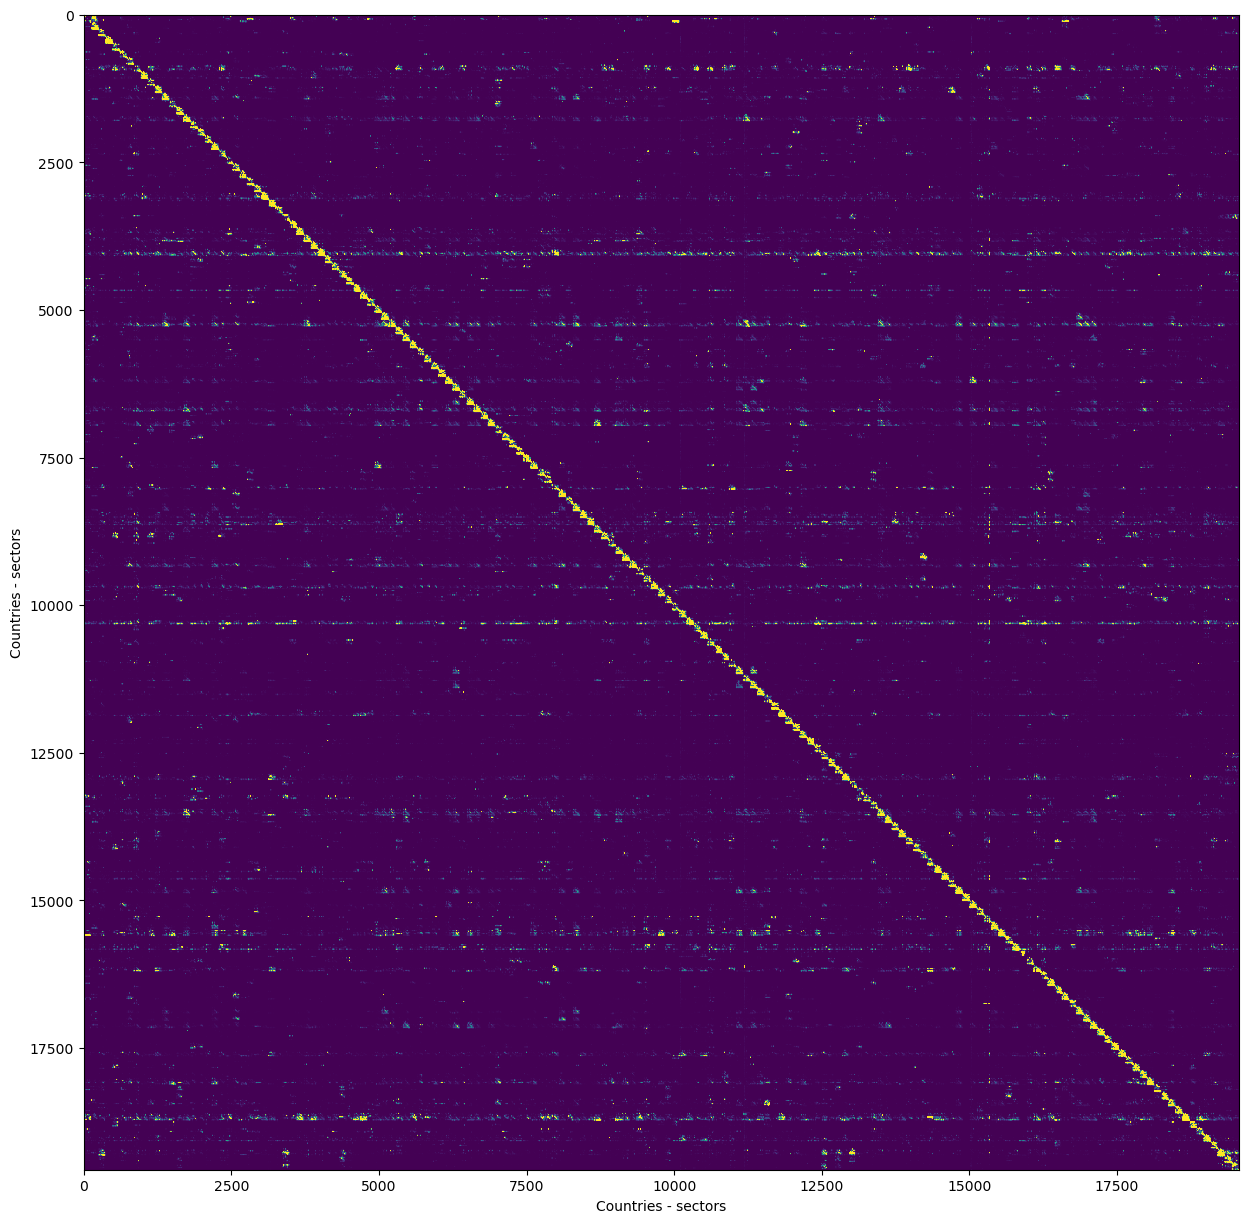

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(gloria.A, vmax=1e-3)
plt.xlabel("Countries - sectors")
plt.ylabel("Countries - sectors")
plt.show()

The available impact data can be checked with:

In [9]:
list(gloria.Q.get_rows())

[('Rice', 'Material'),
 ('Rice_Residues', 'Material'),
 ('Wheat', 'Material'),
 ('Wheat_Residues', 'Material'),
 ('Barley', 'Material'),
 ('Barley_Residues', 'Material'),
 ('Buckwheat', 'Material'),
 ('Buckwheat_Residues', 'Material'),
 ('Canary seed', 'Material'),
 ('Canary seed_Residues', 'Material'),
 ('Cereals n.e.c.', 'Material'),
 ('Cereals n.e.c._Residues', 'Material'),
 ('Fonio', 'Material'),
 ('Fonio_Residues', 'Material'),
 ('Maize (corn)', 'Material'),
 ('Maize (corn)_Residues', 'Material'),
 ('Millet', 'Material'),
 ('Millet_Residues', 'Material'),
 ('Mixed grain', 'Material'),
 ('Mixed grain_Residues', 'Material'),
 ('Oats', 'Material'),
 ('Oats_Residues', 'Material'),
 ('Quinoa', 'Material'),
 ('Quinoa_Residues', 'Material'),
 ('Rye', 'Material'),
 ('Rye_Residues', 'Material'),
 ('Sorghum', 'Material'),
 ('Sorghum_Residues', 'Material'),
 ('Triticale', 'Material'),
 ('Triticale_Residues', 'Material'),
 ('Natural rubber in primary forms', 'Material'),
 ('Natural rubber in 

And to get for example the footprint of a specific impact do:

In [10]:
print(gloria.Q.unit.loc["'GHG_total_EDGAR_consistent'"])
gloria.Q.D_cba_reg.loc["'GHG_total_EDGAR_consistent'"]

                                        unit
category                                    
Emissions (EDGAR)  kilotonnes CO2-equivalent


,region,XAM,XEU,XAF,XAS,AFG,AGO,ALB,ARE,ARG,ARM,...,UKR,URY,USA,UZB,VEN,VNM,YEM,ZAF,ZMB,ZWE
category,unit,,,,,,,,,,,,,,,,,,,,,
Emissions (EDGAR),kilotonnes CO2-equivalent,65411.62391,10338.82281,27460.85726,323070.133542,34819.243612,82624.271039,11482.938591,172195.449582,346888.788009,12848.120275,...,247911.522154,20735.949279,7.188964e+06,144588.357464,288044.862149,307226.880485,69731.519367,454437.511084,26084.801587,31380.100011


## Visualizing the data

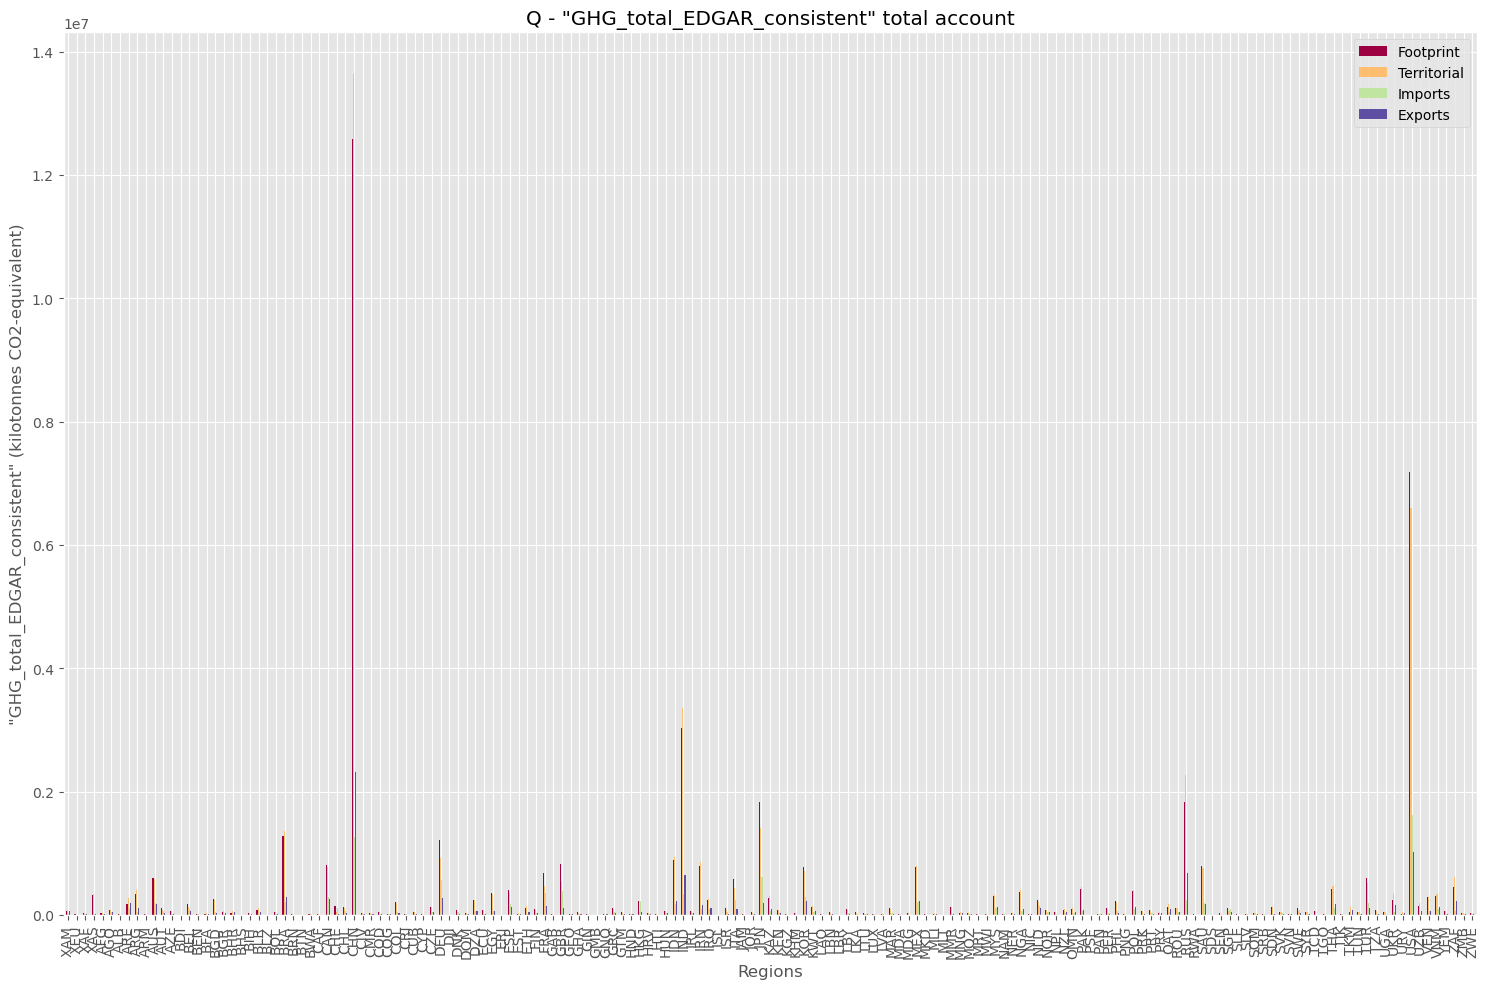

In [11]:
with plt.style.context("ggplot"):
    gloria.Q.plot_account(["'GHG_total_EDGAR_consistent'"], figsize=(15, 10))
    plt.show()

See the other notebooks for further information on [aggregation](../notebooks/aggregation_examples.ipynb) and [file io](../notebooks/load_save_export.ipynb).